Muhamad Fauzi Akbar_202331192

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

1. Import panda as pd : kita pakai untuk mengimport library panda yang diapkai untuk analsis data, cocok untuk data yang pakai tabel
2. from sklearn.model_selection import train_test_split : kita pakai untuk nanti kita gunakan untuk train_test_split datanya
3. from sklearn.naive_bayes import GaussianNB : untuk import gaussianNB yang kita pakai untuk naive bayes yang menggunakan distribusi gaussian
4. from sklearn.metrics import accuracy_score,classification_report,confusion_matrix : kita membuat parameter untuk akurasi skor, laporan klasifikasi dan untuk menampilkan confusion matrixnya

In [20]:
df = pd.read_csv('K04_bank_customers.csv', sep=';')

untuk membaca dan impor dari data dari K04_bank_costumer.csv, 
kita pakai separator ';' agar datanya lebih rapi dan sesuai tabel

In [46]:
print(df.head())
print(df.info())
print(df.describe())

   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #

1. dipakai untuk menunjukan 5 data awal
2. info() memberi kita info tentang gambaran besar bagaimana data yang akan kita gunakan
3. describe () memberikan detail datanya seperti mean, min max dan persentilnya
intinya adalah memberi kita gambaran tentang data yang akan kita olah

In [49]:
X = df.drop(columns=['job'])
y = df['loan']

X = pd.get_dummies(X, drop_first=True)

menghapus kolom job dalam model, kemudian kita mengubah kategori menjadi format numerik yang bisa kita pakai untuk model.

disini kita juga akan menjadikan loan untuk diprediksi

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


disini kita melatih data dengan 80% sebagai data latih dan sisa 20% jadi data uji

In [28]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

gaussiaNB() Kita pakai untuk membuat model naive bayes dengan menggunakan distribusi gaussian
fisini kita juga melatih model X_train dan Y_train jadi model siap dipakai untuk prediksi data baru

In [62]:
y_pred = model.predict(X_test)
print("Akurasi:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Akurasi: 0.9997788344575915
Classification Report:
               precision    recall  f1-score   support

          no       1.00      1.00      1.00      7634
         yes       1.00      1.00      1.00      1409

    accuracy                           1.00      9043
   macro avg       1.00      1.00      1.00      9043
weighted avg       1.00      1.00      1.00      9043

Confusion Matrix:
 [[7634    0]
 [   2 1407]]


1. Akurasi mengukur seberapa banyak prediksi yang benar.
2. Classification Report memberikan metrik seperti precision, recall, dan F1-score.
3. Confusion Matrix menunjukkan bagaimana model mengklasifikasikan data dengan membandingkan prediksi dan nilai sebenarnya.

dalam artian bahwa kita akan mendapat gambaran tentang kinerja model klasifikasi yang sudah kita buah pada data uji

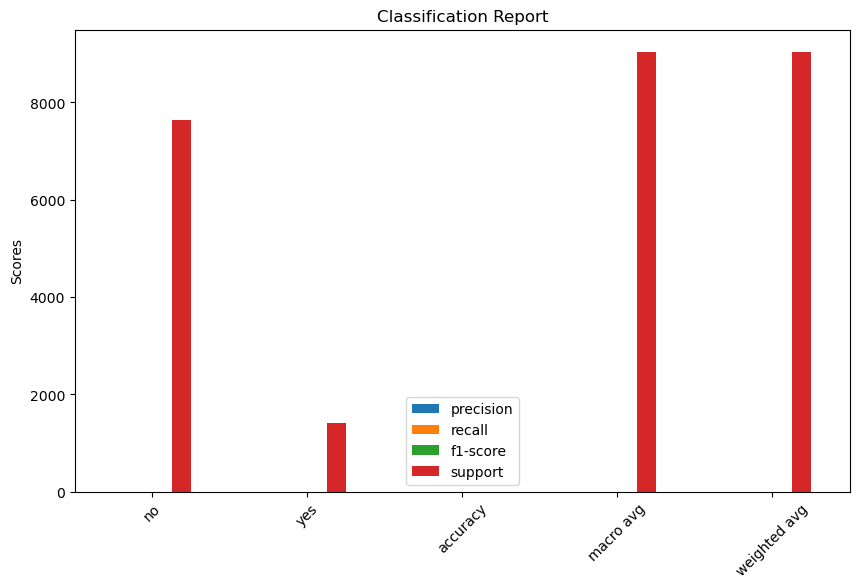

In [32]:
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()
report_df.plot(kind='bar', figsize=(10, 6))
plt.title('Classification Report')
plt.ylabel('Scores')
plt.xticks(rotation=45)
plt.show()

kita pakai untuk membuat bagan pada hasil classification report

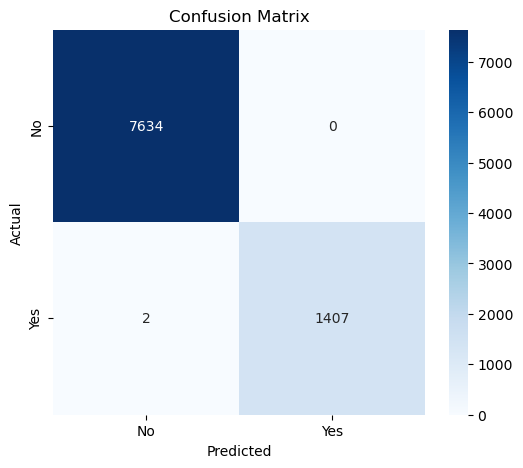

In [34]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

dan ini untuk gambaran dari confusion matrix